In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics as stat
import numpy as np
import seaborn as sns
from scipy import stats

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
tumors = study_results['Tumor Volume (mm3)']

print(mouse_metadata.head())
study_results.head()


  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
study_results.head()
df = pd.DataFrame.merge(study_results,mouse_metadata, on = 'Mouse ID')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor = stat.mean(tumors) 
median_tumor = stat.median(tumors)
var_tumor = stat.variance(tumors)
stdev_tumor = stat.stdev(tumors)
sem_tumor = st.sem(tumors)
tumor_table = pd.DataFrame([mean_tumor])
tumor_table['Mean'] = mean_tumor
tumor_table = tumor_table.drop(columns = [0])
tumor_table['Median'] = median_tumor
tumor_table['Var'] = var_tumor
tumor_table['StDev'] = stdev_tumor
tumor_table['SEM'] = sem_tumor
tumor_table

,Mean,Median,Var,StDev,SEM
0,50.448381,48.951474,79.116074,8.894722,0.204436


## Bar plots

Text(0, 0.5, '# of Cases')

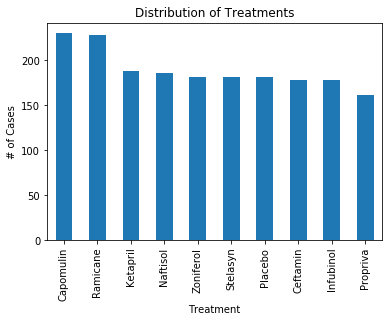

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen = df['Drug Regimen']
treatment_plot = regimen.value_counts().plot(kind='bar', title = 'Distribution of Treatments')
treatment_plot.set_xlabel("Treatment")
treatment_plot.set_ylabel("# of Cases")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

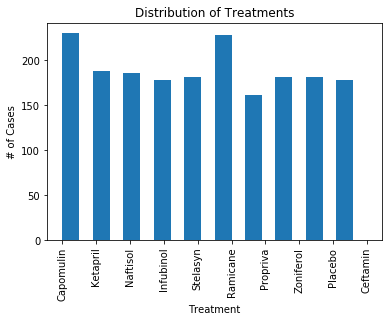

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
treatment = df['Drug Regimen']
x_axis = np.arange(len(treatment))
bar_plt = plt.hist(treatment, width=0.5)
plt.title('Distribution of Treatments')
plt.ylabel('# of Cases')
plt.xlabel('Treatment')
plt.xticks(rotation='vertical')


## Pie plots

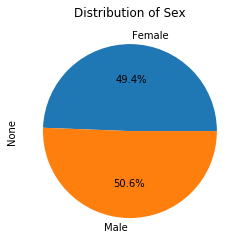

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = df.groupby('Sex').size()
pie = sex.plot.pie(title = 'Distribution of Sex',autopct="%1.1f%%")



Text(0.5, 1.0, 'Distribution of Sex')

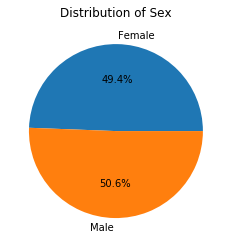

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
pie_plt = plt.pie(sex,labels = labels,autopct="%1.1f%%")
plt.title('Distribution of Sex')




## Quartiles, outliers and boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
volume = df['Tumor Volume (mm3)']
iqr = st.iqr(volume)
top_range = df['Tumor Volume (mm3)'].mean() + iqr
bottom_range = df['Tumor Volume (mm3)'].mean() - iqr
upper_outliers = []
lower_outliers = []
if volume.any() > top_range:
    upper_outliers.append(df['Tumor Volume (mm3)'])
if volume.any() < bottom_range:
    lower_outliers.append(df['Tumor Volume (mm3)'])
print(len(upper_outliers))
print(len(lower_outliers))

0
1


[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Naftisol'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Zoniferol'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Ceftamin')]

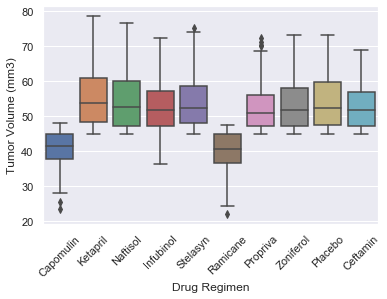

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
sns.set()
tumor_by_treatment_plot = sns.boxplot(y='Tumor Volume (mm3)',
                                      x='Drug Regimen',data = df)
tumor_by_treatment_plot.set_xticklabels(tumor_by_treatment_plot.get_xticklabels(), rotation=45)



## Line and scatter plots

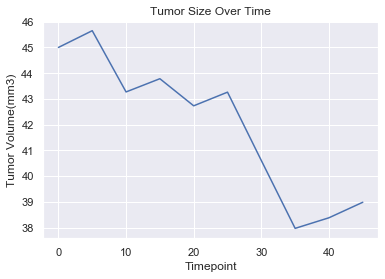

In [51]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
is_0 = df['Drug Regimen'] == 'Capomulin'
results_0 = df[is_0]
mouse_0 = results_0.iloc[0]['Mouse ID']
mouse_0 = results_0['Mouse ID'] == mouse_0
mouse_0 = results_0[mouse_0]


plt.plot(mouse_0['Timepoint'],mouse_0['Tumor Volume (mm3)'])
plt.title('Tumor Size Over Time')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume(mm3)')
plt.show()


Text(0, 0.5, 'Tumor Volume(mm3)')

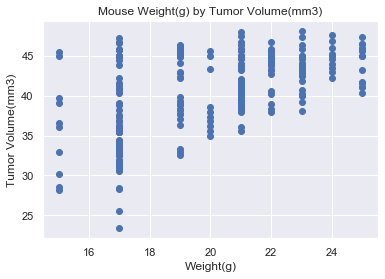

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(results_0['Weight (g)'], results_0['Tumor Volume (mm3)'])
plt.title('Mouse Weight(g) by Tumor Volume(mm3)')
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume(mm3)')


In [54]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_data = results_0['Weight (g)']
y_data = results_0['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_data, y_data)
